<a href="https://colab.research.google.com/github/Spyke2022/BookRepo/blob/master/Box_and_Jenkins_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
path = 'https://github.com/EraylsonGaldino/MaterialTS/blob/master/vendas_varejo.xlsx?raw=true'
dados = pd.read_excel(path, index_col='Data')

In [3]:
dados.head()

,Indice
Data,
2000-01-01,53.2
2000-02-01,53.8
2000-03-01,56.1
2000-04-01,56.1
2000-05-01,58.4


In [4]:
dados.tail()

,Indice
Data,
2015-05-01,110.6
2015-06-01,104.1
2015-07-01,106.8
2015-08-01,106.6
2015-09-01,103.1


In [5]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

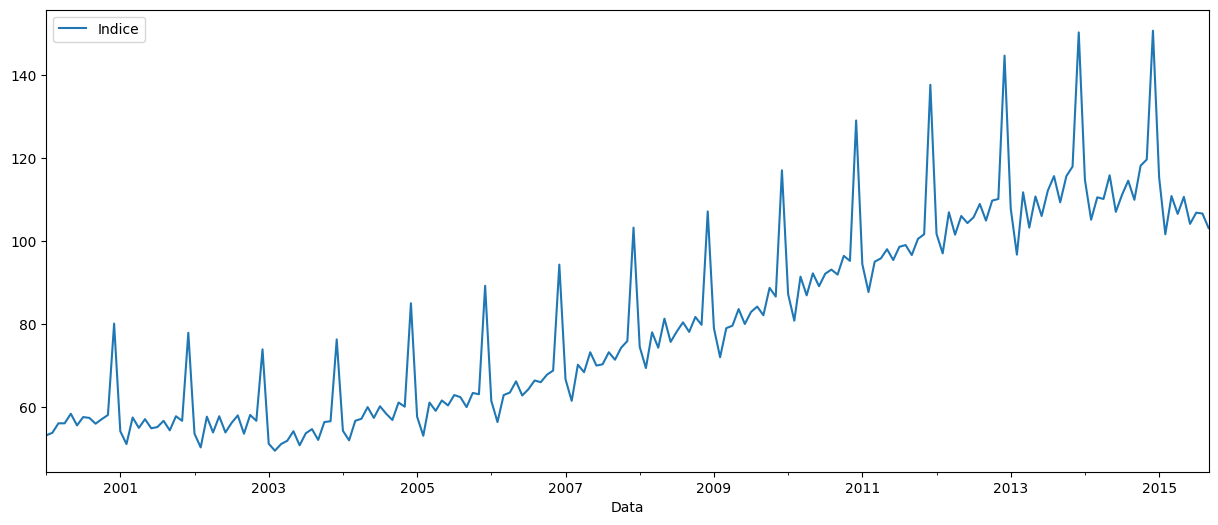

In [6]:
dados.plot();

In [7]:
#treinamento e teste
train_data, test_data = dados.loc['2000':'2011'], dados.loc['2012':]

In [8]:
train_data

,Indice
Data,
2000-01-01,53.2
2000-02-01,53.8
2000-03-01,56.1
2000-04-01,56.1
2000-05-01,58.4
...,...
2011-08-01,99.0
2011-09-01,96.6
2011-10-01,100.5


In [9]:
test_data

,Indice
Data,
2012-01-01,101.7
2012-02-01,97.0
2012-03-01,106.9
2012-04-01,101.5
2012-05-01,106.0
2012-06-01,104.3
2012-07-01,105.7
2012-08-01,108.9
2012-09-01,104.9


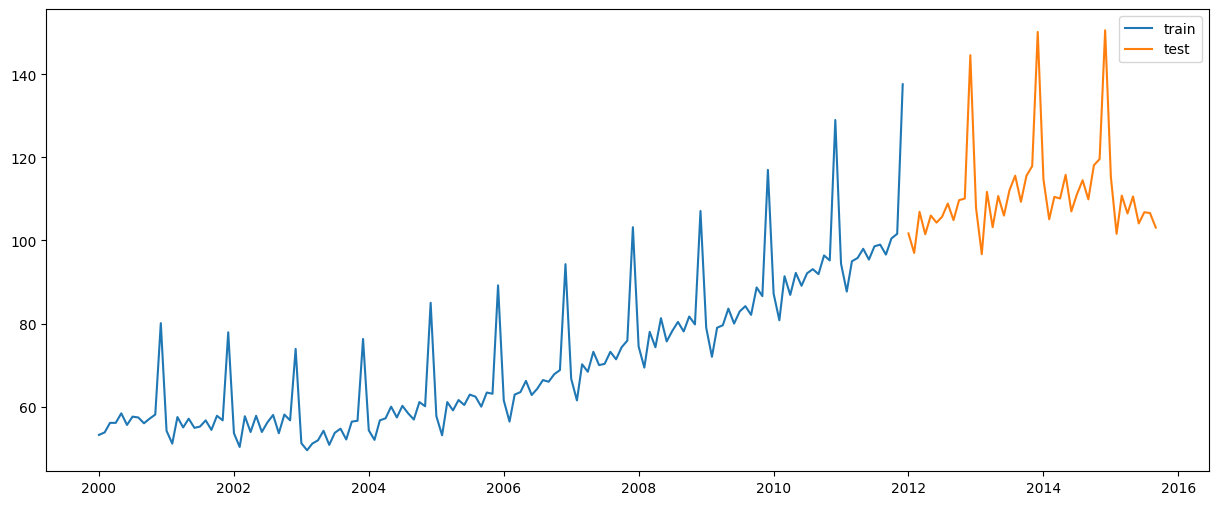

In [10]:
plt.plot(train_data, label='train')
plt.plot(test_data, label = 'test')
plt.legend(loc= 'best')
plt.show()

In [11]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html
from statsmodels.tsa.statespace.sarimax import SARIMAX

Identificação

In [13]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

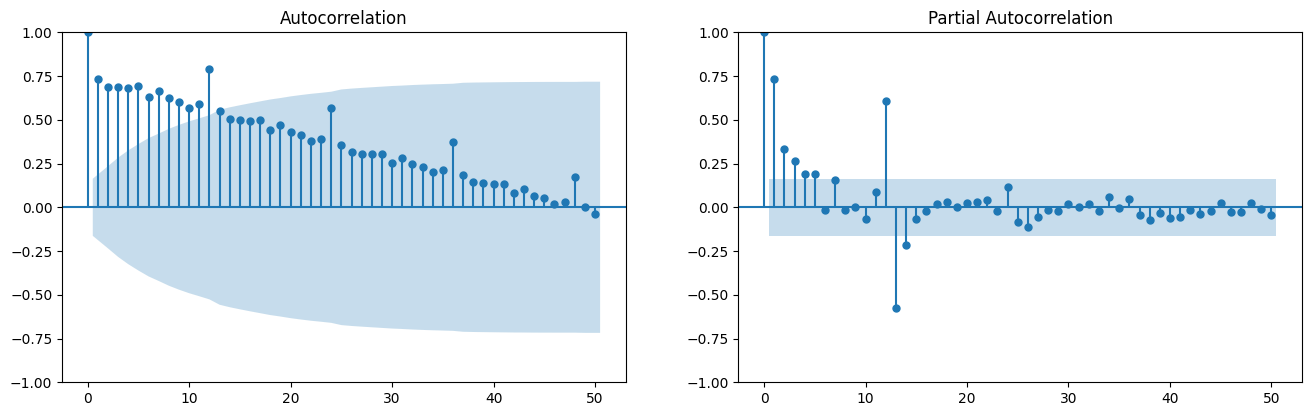

In [14]:
qtd_lag = 50
acf_pacf(train_data, qtd_lag)

In [15]:
## teste de estacionariedade
from statsmodels.tsa.stattools import adfuller

In [16]:
def teste_df(serie):
    #H0: série não estacionária
    dftest = adfuller(serie, autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags','Nº Observações'])
    for key,value in dftest[4].items():
        df_output['Valor Crítico (%s)'%key] = value
    print(df_output)
    if df_output[0] < df_output['Valor Crítico (10%)']: # descarta a H0 se o teste estatistico for menor que o valor crítico

        print('--------estacionária')
    else:
        print(df_output[0])
        print('--------não estacionária')

In [17]:
teste_df(train_data.Indice)

Test Statistic           0.435846
p-value                  0.982787
#Lags                   14.000000
Nº Observações         129.000000
Valor Crítico (1%)      -3.482088
Valor Crítico (5%)      -2.884219
Valor Crítico (10%)     -2.578864
dtype: float64
0.43584601670994955
--------não estacionária


In [18]:
teste_df(train_data.Indice.diff(12).diff(12).dropna())

Test Statistic          -2.753012
p-value                  0.065305
#Lags                   13.000000
Nº Observações         106.000000
Valor Crítico (1%)      -3.493602
Valor Crítico (5%)      -2.889217
Valor Crítico (10%)     -2.581533
dtype: float64
--------estacionária


In [19]:
#parâmetros
d = 2
p = 12
q = 12

#ARIMA(p, d, q)






#### Modelagem

In [20]:
P,D,Q,m = 0,0,0,12#1,1,1,12

#P olhar no ACF apenas nos lags do ciclo a cada m meses.


model = SARIMAX(endog=train_data,order=(p,d,q),seasonal_order=(P,D,Q,m)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optim

In [21]:
model.predict(typ='levels')

2000-01-01      0.000000
2000-02-01     79.796976
2000-03-01     54.440330
2000-04-01     57.427649
2000-05-01     57.276071
                 ...    
2011-08-01     99.536636
2011-09-01     97.946813
2011-10-01     99.947967
2011-11-01    101.279983
2011-12-01    132.587053
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64

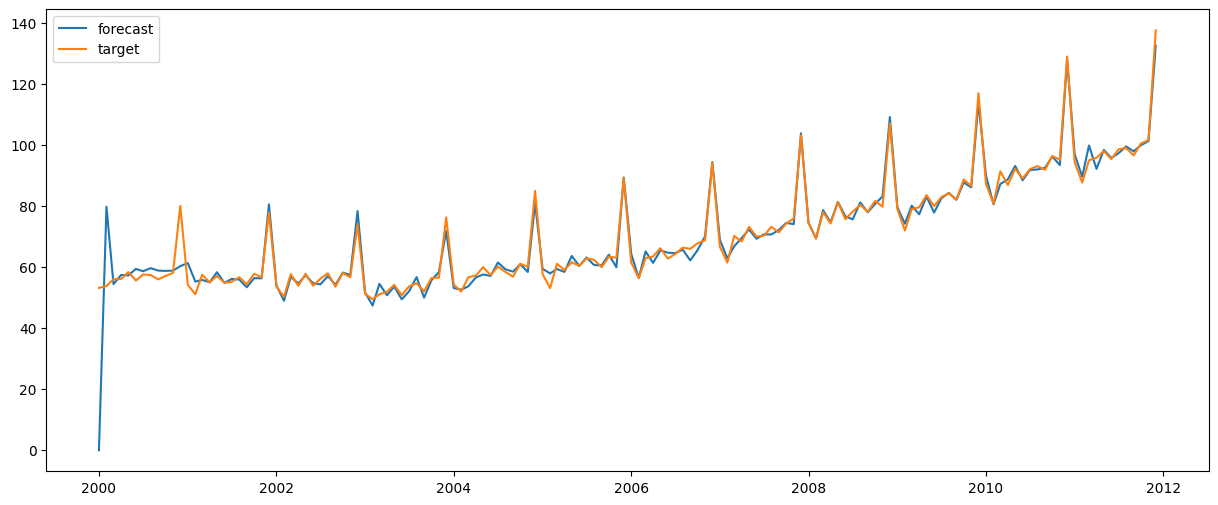

In [22]:
plt.plot(model.predict(typ='levels'), label = 'forecast')
plt.plot(train_data, label = 'target')
plt.legend()
plt.show()

#### Avaliação

In [23]:
train_predict = model.predict(typ='levels')
residuo = train_data.Indice.values - train_predict

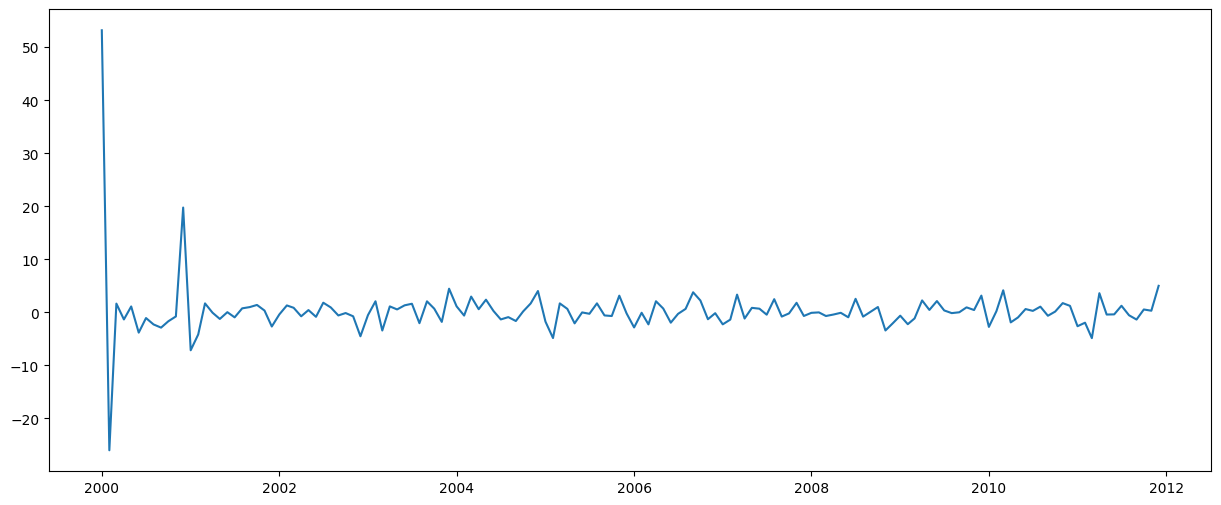

In [24]:
plt.plot(residuo);

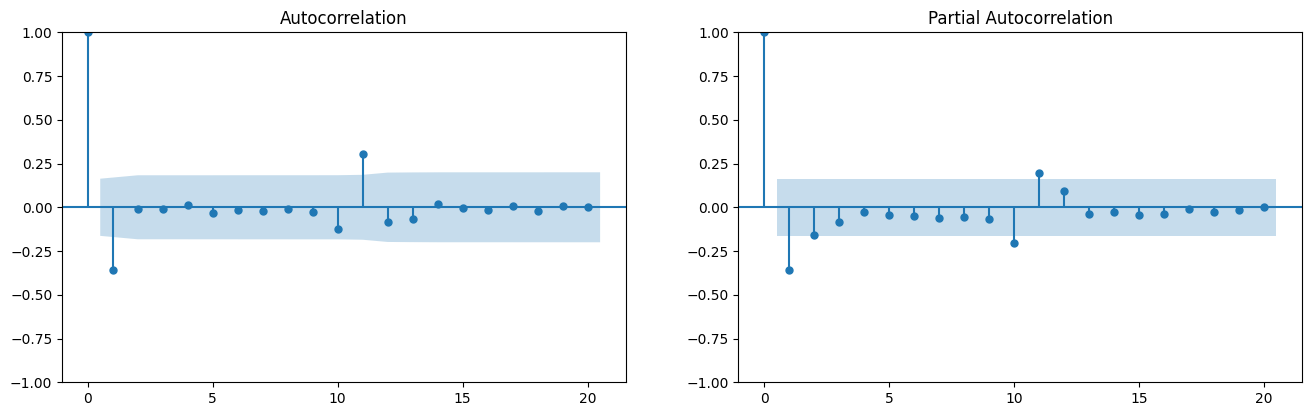

In [25]:
acf_pacf(residuo, 20)

In [26]:
MAPE(train_data.Indice.values,train_predict )

3.337649350858987

#### Teste

In [27]:
predict_test = model.forecast(len(test_data))

In [28]:
test_data.Indice.values

array([101.7,  97. , 106.9, 101.5, 106. , 104.3, 105.7, 108.9, 104.9,
       109.7, 110.1, 144.6, 107.8,  96.7, 111.7, 103.2, 110.7, 106. ,
       112.1, 115.6, 109.3, 115.6, 117.9, 150.2, 114.7, 105.1, 110.5,
       110.1, 115.8, 107. , 111.1, 114.5, 109.9, 118.1, 119.6, 150.6,
       115.3, 101.6, 110.8, 106.5, 110.6, 104.1, 106.8, 106.6, 103.1])

In [29]:
predict_test

2012-01-01    105.970444
2012-02-01     98.761642
2012-03-01    104.965082
2012-04-01    106.877721
2012-05-01    109.048668
2012-06-01    106.131494
2012-07-01    110.626473
2012-08-01    109.455967
2012-09-01    108.820850
2012-10-01    109.810619
2012-11-01    110.355918
2012-12-01    146.529421
2013-01-01    115.840158
2013-02-01    108.345769
2013-03-01    114.702799
2013-04-01    116.417672
2013-05-01    119.033351
2013-06-01    116.159671
2013-07-01    120.445543
2013-08-01    119.905999
2013-09-01    118.594114
2013-10-01    119.611017
2013-11-01    119.897966
2013-12-01    156.136990
2014-01-01    126.323228
2014-02-01    118.482493
2014-03-01    124.926443
2014-04-01    126.400612
2014-05-01    129.388085
2014-06-01    126.534724
2014-07-01    130.567127
2014-08-01    130.630731
2014-09-01    128.637282
2014-10-01    129.641492
2014-11-01    129.654666
2014-12-01    165.912745
2015-01-01    136.963206
2015-02-01    128.764890
2015-03-01    135.272308
2015-04-01    136.502043


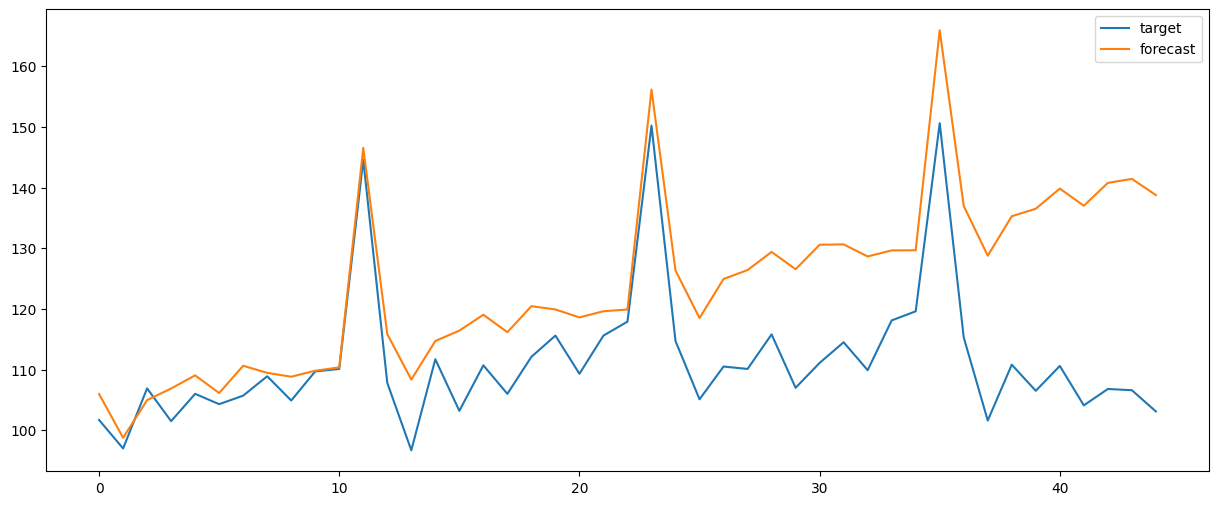

In [30]:

plt.plot(test_data.Indice.values, label = 'target')
plt.plot(predict_test.values, label = 'forecast')
plt.legend()
plt.show()

In [32]:
MAPE(test_data.Indice.values,predict_test )

11.551607734163909